In [1]:
import pandas as pd
import os
data_dir = "./data"
data_path = os.path.join(data_dir,"poems.csv")
data_df = pd.read_csv(data_path)

D:\Anaconda3\lib\site-packages\numpy\core\__init__.py:29: UserWarning: loaded more than 1 DLL from .libs:
D:\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.CSRRD7HKRKC3T3YXA7VY7TAZGLSWDKW6.gfortran-win_amd64.dll
D:\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
data_df.head()

,题目,朝代,作者,内容
0,赠歌者杜氏入道三首 其三,元,潘纯,云髻高梳鬓不分，扫除虚室事元君。新糊白纸屏风上，尽画蓬莱五色云。
1,七岁游法兴寺,元,胡天游,山色摇光入袖凉，松阴十丈印回廊。老僧读罢楞严咒，一殿神风柏子香。
2,新岁忆曾子白,元,陈高,经月愁闻雨，新年苦忆君。青华为客久，白发著书勤。酒共邻僧饮，蔬从野老分。何时共登眺，整屐待晴云。
3,城西虎跑寺,元,陈高,石势虎蹲伏，山形龙屈盘。寺开唐殿阁，坟掩宋衣冠。幽涧泉声细，斜阳塔影寒。近城多战鼓，栖息此中安。
4,赠章以元昆仲,元,陈高,相见谈经史，江楼坐夜阑。风声吹屋响，灯影照人寒。俗薄交游尽，时危出处难。衰年逢二妙，亦得闷怀宽。


In [3]:
from collections import Counter
import gc

## 全局高频词分析

In [4]:
data=data_df.loc[data_df['朝代'] =="唐", ['内容']][:10]
data

,内容
58259,风淅淅。夜雨连云黑。滴滴。窗外芭蕉灯下客。除非魂梦到乡国。免被关山隔。忆忆。一句枕前争忘得。
58260,别路云初起，离亭叶正飞。所嗟人异雁，不作一行归。
58261,弄玉有夫皆得道，刘纲兼室尽登仙。君能仔细窥朝露，须逐云车拜洞天。
58262,萧郎不顾凤楼人，云涩回车泪脸新。愁想蓬瀛归去路，难窥旧苑碧桃春。
58263,谪居蓬岛别瑶池，春媚烟花有所思。为爱君心能洁白，愿操箕帚奉屏帏。
58264,湖上青山今欲买，白云无主问何人。
58265,一朵花开千叶红，开时又不藉春风。若教移在香闺畔，定与佳人艳态同。
58266,不语凄凉无限情，荒阶行尽又重行。昔年住此何人在，满地槐花秋草生。
58267,霜陨中春花半无，狂游恣饮尽凶徒。年年赏玩公卿辈，今委沟塍骨渐枯。
58268,风舞槐花落御沟，终南山色入城秋。门门走马徵兵急，公子笙歌醉玉楼。


In [5]:
data_df.dropna(subset=['内容'], inplace=True)

del data
gc.collect()

0

In [6]:
dynastys=["先秦", "汉", "魏晋", "隋", "唐", "五代", "宋", "辽", "金", "元", "明", "清", "民国", "近代", "当代","未知"]

stopwords = set(["","，","。"," ","？","“","!","\u3000","、","”","□",
                 "：","！","；",
                '有','而', '何', '乎', '乃', '其', '且', '若', 
                 '所', '为', '焉', '以', '因', '于', '与', '也', 
                 '则', '者', '之', '不', '自', '得', '一', '来',
                 '去', '无', '可', '是', '已', '此', '的', '上',
                 '中', '兮', '三'])

# 高频词云

In [17]:
font_path=os.path.join(data_dir,"..","fonts",'simsun.ttc')
print(font_path)
os.environ['FONT_PATH'] =font_path #linux
# print(font_path)

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

stopwords = set(["","，","。"," ","？","“","!","\u3000","、","”","□",
                 "：","！","；",
                '有','而', '何', '乎', '乃', '其', '且', '若', 
                 '所', '为', '焉', '以', '因', '于', '与', '也', 
                 '则', '者', '之', '不', '自', '得', '一', '来',
                 '去', '无', '可', '是', '已', '此', '的', '上',
                 '中', '兮', '三'])
cloud = WordCloud(
    # 设置字体，不指定就会出现乱码
    font_path=font_path,
    # font_path=path.join(d,'simsun.ttc'),
    # 设置背景色
    background_color='white',
    # # 词云形状
    # mask=color_mask,
    # 允许最大词汇
    max_words=200,
    # 最大号字体
#     max_font_size=40,
    min_font_size=10,
#     width = 6000,
#     height = 4000,
#     background_color = 'black',
)


def show_wordcloud(text,dynasty,count=20):
    """以空格分隔的字符串"""
    _word_counts = Counter(text.split(" "))
    print(_word_counts.most_common()[:count])
    word_counts={w:c for w,c in _word_counts.items() if w and w not in stopwords}
    wCloud = cloud.generate_from_frequencies(word_counts)
    wCloud.to_file('{}.jpg'.format(dynasty))
    plt.imshow(wCloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

./data\..\fonts\simsun.ttc


## 全局高频词云

In [18]:
text="".join(data_df["内容"].values)

In [19]:
text[:10]

'云髻高梳鬓不分，扫除'

[('。', 6754178), ('，', 6599019), ('不', 790072), ('人', 631986), ('一', 589025), ('山', 478570), ('', 446788), ('有', 434787), ('风', 412634), ('天', 401544), ('日', 374115), ('无', 370680), ('何', 362635), ('花', 346764), ('春', 318550), ('来', 316579), ('云', 310477), ('中', 305033), ('生', 301563), ('如', 301216), ('年', 299462), ('月', 291275), ('自', 285675), ('水', 279604), ('上', 262421), ('我', 262278), ('相', 250397), ('心', 250314), ('知', 238567), ('此', 237373), ('时', 233736), ('清', 229069), ('得', 224862), ('是', 221292), ('未', 220861), ('君', 217326), ('秋', 215899), ('江', 214340), ('子', 213035), ('雨', 208888), ('白', 205925), ('去', 204956), ('今', 203847), ('为', 203684), ('三', 201479), ('千', 199605), ('行', 197310), ('明', 192739), ('事', 192478), ('老', 192117), ('空', 190819), ('下', 190674), ('高', 188453), ('在', 184782), ('长', 183882), ('里', 183579), ('夜', 183207), ('青', 182734), ('寒', 182431), ('家', 178710), ('可', 178101), ('玉', 175725), ('归', 168761), ('酒', 164427), ('南', 164184), ('已', 163236), ('金', 16

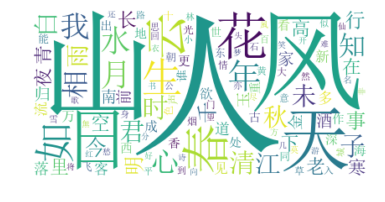

In [21]:
show_wordcloud(" ".join(text),"全局",count=200)

## 各朝代高频词云

-------------------- 先秦 --------------------
[('子', 1682), ('我', 1477), ('人', 1301), ('曰', 1072), ('君', 1012), ('王', 981), ('天', 768), ('如', 709), ('矣', 682), ('心', 671), ('彼', 652), ('既', 605), ('言', 547), ('大', 539), ('尔', 528), ('维', 524), ('下', 507), ('将', 486), ('吾', 479), ('公', 473), ('在', 471), ('知', 457), ('国', 454), ('夫', 451), ('行', 439), ('民', 431), ('日', 396), ('思', 374), ('归', 363), ('方', 347)]


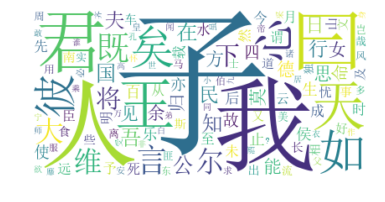

-------------------- 汉 --------------------
[('人', 1020), ('子', 963), ('王', 791), ('天', 706), ('下', 689), ('曰', 632), ('我', 580), ('心', 518), ('相', 495), ('公', 479), ('大', 465), ('日', 453), ('生', 440), ('行', 439), ('时', 432), ('故', 430), ('长', 422), ('如', 403), ('能', 401), ('君', 398), ('夫', 392), ('将', 373), ('欲', 367), ('言', 366), ('知', 366), ('余', 356), ('臣', 350), ('风', 343), ('后', 339), ('秦', 338)]


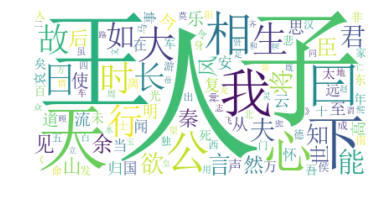

-------------------- 魏晋 --------------------
[('我', 1674), ('人', 1592), ('天', 1312), ('风', 1225), ('子', 1061), ('时', 1043), ('云', 1010), ('日', 987), ('生', 965), ('心', 921), ('在', 909), ('长', 900), ('清', 884), ('言', 829), ('如', 825), ('相', 810), ('明', 803), ('山', 795), ('游', 756), ('思', 738), ('高', 732), ('流', 724), ('飞', 706), ('神', 646), ('下', 639), ('行', 634), ('朝', 628), ('德', 628), ('世', 620), ('君', 618)]


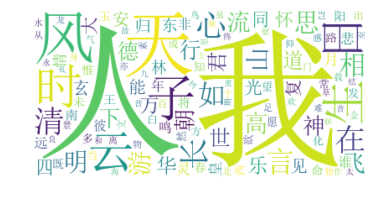

-------------------- 隋 --------------------
[('天', 585), ('风', 526), ('人', 449), ('云', 413), ('道', 406), ('长', 374), ('日', 367), ('时', 367), ('生', 342), ('神', 335), ('明', 331), ('我', 316), ('山', 315), ('流', 293), ('花', 290), ('金', 287), ('月', 279), ('飞', 273), ('德', 266), ('光', 266), ('心', 265), ('玉', 262), ('万', 261), ('相', 259), ('水', 259), ('大', 251), ('子', 248), ('灵', 247), ('行', 246), ('高', 240)]


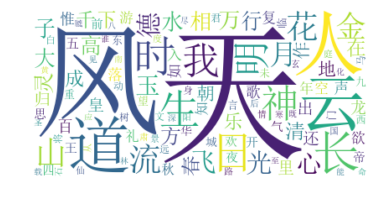

-------------------- 唐 --------------------
[('人', 67801), ('山', 50583), ('日', 46971), ('天', 39213), ('花', 35021), ('水', 34494), ('月', 34173), ('春', 33995), ('风', 31406), ('相', 30999), ('生', 30992), ('年', 30206), ('心', 29776), ('云', 28995), ('君', 28884), ('如', 28439), ('知', 28030), ('白', 26640), ('行', 25211), ('秋', 24698), ('下', 23840), ('清', 23812), ('在', 23715), ('时', 23478), ('空', 23472), ('夜', 23048), ('江', 22871), ('高', 22793), ('未', 22034), ('明', 21938)]


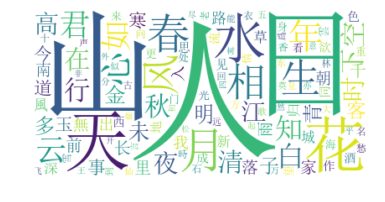

-------------------- 五代 --------------------
[('风', 57), ('花', 57), ('春', 57), ('香', 46), ('人', 45), ('红', 39), ('玉', 36), ('梦', 35), ('金', 35), ('月', 33), ('愁', 32), ('日', 29), ('烟', 29), ('水', 26), ('双', 26), ('雨', 25), ('山', 25), ('相', 24), ('恨', 24), ('帘', 24), ('长', 23), ('空', 23), ('落', 22), ('满', 22), ('情', 22), ('绿', 22), ('轻', 22), ('楼', 21), ('归', 21), ('心', 21)]


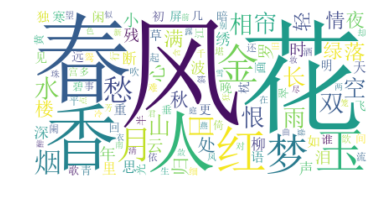

-------------------- 宋 --------------------
[('人', 277848), ('山', 205316), ('天', 165638), ('日', 153756), ('如', 140907), ('风', 139383), ('花', 136915), ('春', 135798), ('生', 132915), ('年', 132023), ('月', 117380), ('知', 116610), ('我', 112993), ('水', 111361), ('未', 110223), ('相', 107742), ('清', 106448), ('心', 101446), ('老', 100838), ('子', 96203), ('今', 95443), ('君', 95293), ('事', 94862), ('云', 93352), ('雨', 90326), ('無', 90119), ('行', 88448), ('千', 86637), ('江', 85909), ('时', 83833)]


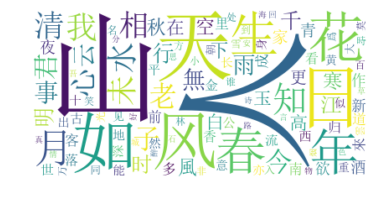

-------------------- 辽 --------------------
[('吟', 13), ('君', 11), ('待', 10), ('当', 7), ('深', 7), ('心', 6), ('天', 6), ('犹', 5), ('香', 5), ('王', 5), ('子', 5), ('作', 4), ('万', 4), ('铺', 4), ('妾', 4), ('相', 4), ('智', 4), ('四', 3), ('岁', 3), ('面', 3), ('北', 3), ('金', 3), ('风', 3), ('时', 3), ('世', 3), ('能', 3), ('那', 3), ('云', 3), ('知', 3), ('枕', 3)]


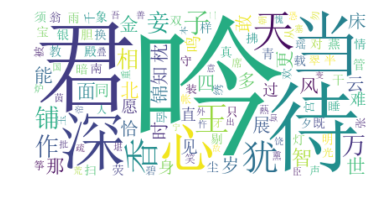

-------------------- 金 --------------------
[('人', 3585), ('山', 3078), ('风', 3012), ('天', 1958), ('云', 1842), ('日', 1803), ('年', 1797), ('花', 1710), ('春', 1674), ('生', 1554), ('时', 1533), ('月', 1481), ('如', 1476), ('水', 1274), ('老', 1267), ('秋', 1184), ('归', 1135), ('相', 1118), ('未', 1099), ('酒', 1094), ('知', 1089), ('见', 1087), ('事', 1086), ('里', 1085), ('心', 1077), ('长', 1071), ('我', 1051), ('青', 1038), ('清', 1023), ('谁', 1017)]


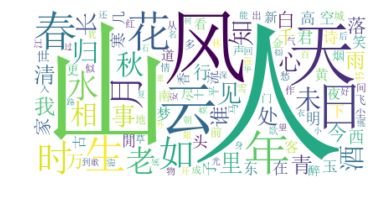

-------------------- 元 --------------------
[('人', 50180), ('我', 44808), ('云', 31856), ('风', 31682), ('山', 29776), ('你', 28566), ('日', 27487), ('天', 27223), ('生', 24478), ('花', 23021), ('了', 21951), ('如', 21669), ('儿', 20568), ('子', 19709), ('里', 19071), ('这', 18993), ('月', 18932), ('家', 18697), ('春', 18517), ('下', 18129), ('时', 18036), ('水', 17939), ('相', 17473), ('在', 17253), ('他', 17055), ('今', 16736), ('年', 16735), ('心', 16450), ('道', 16445), ('老', 16123)]


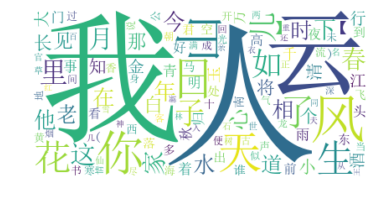

-------------------- 明 --------------------
[('人', 123423), ('风', 110781), ('山', 110557), ('云', 94699), ('日', 89748), ('天', 89505), ('花', 77174), ('春', 69230), ('月', 68716), ('水', 65249), ('年', 62786), ('时', 58771), ('生', 58763), ('白', 57313), ('长', 56040), ('如', 54302), ('江', 53229), ('秋', 52721), ('相', 51784), ('君', 51750), ('心', 51280), ('清', 47797), ('青', 47487), ('高', 47168), ('千', 46446), ('雨', 45594), ('知', 45131), ('子', 44812), ('里', 44432), ('归', 43059)]


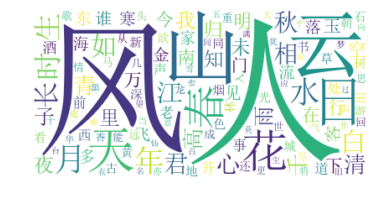

-------------------- 清 --------------------
[('人', 52893), ('风', 46686), ('山', 40951), ('花', 36386), ('天', 36310), ('云', 30451), ('日', 27338), ('春', 27209), ('如', 26024), ('月', 25612), ('年', 25429), ('水', 25296), ('生', 24995), ('时', 22697), ('秋', 21979), ('心', 21142), ('雨', 20561), ('我', 19101), ('相', 18747), ('江', 18705), ('长', 18113), ('声', 17957), ('清', 17804), ('空', 17770), ('里', 16960), ('寒', 16732), ('烟', 16704), ('未', 16454), ('夜', 16281), ('千', 16273)]


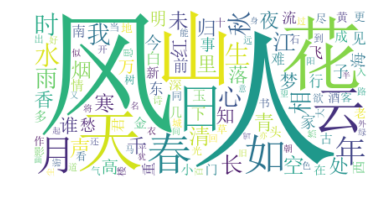

-------------------- 民国 --------------------
[('人', 10854), ('风', 9209), ('花', 8238), ('天', 7479), ('山', 7244), ('春', 6514), ('年', 6268), ('日', 5046), ('如', 4847), ('云', 4836), ('时', 4778), ('心', 4747), ('生', 4745), ('月', 4635), ('水', 4518), ('秋', 4330), ('江', 4188), ('梦', 4167), ('相', 3957), ('红', 3925), ('雨', 3683), ('未', 3526), ('我', 3511), ('寒', 3458), ('香', 3448), ('愁', 3305), ('谁', 3276), ('事', 3253), ('夜', 3191), ('归', 3188)]


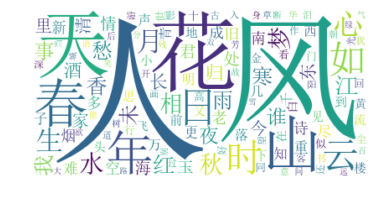

-------------------- 近代 --------------------
[('人', 16821), ('风', 16043), ('山', 12951), ('天', 12917), ('花', 12011), ('春', 10770), ('年', 10004), ('云', 8958), ('如', 8328), ('心', 8245), ('日', 8229), ('生', 8185), ('月', 7885), ('梦', 7715), ('水', 7669), ('时', 7325), ('秋', 7093), ('江', 7029), ('相', 6767), ('雨', 6745), ('长', 6200), ('未', 6011), ('情', 5764), ('红', 5761), ('谁', 5742), ('万', 5666), ('千', 5545), ('声', 5539), ('我', 5522), ('事', 5504)]


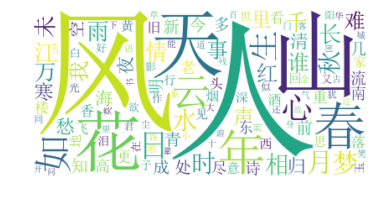

-------------------- 当代 --------------------
[('人', 15306), ('风', 14213), ('天', 11386), ('山', 10326), ('花', 9667), ('心', 8898), ('如', 8786), ('春', 8473), ('生', 8416), ('云', 8410), ('年', 8183), ('梦', 7871), ('我', 7772), ('月', 7125), ('水', 7062), ('日', 6978), ('时', 6869), ('雨', 6341), ('相', 5926), ('谁', 5804), ('千', 5760), ('清', 5419), ('长', 5413), ('秋', 5393), ('夜', 5346), ('未', 5079), ('情', 4975), ('空', 4891), ('红', 4815), ('青', 4749)]


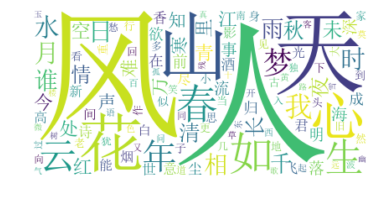

-------------------- 未知 --------------------


In [23]:
for dynasty in dynastys:
    poem_str = "".join(data_df.loc[data_df['朝代'] ==dynasty, ['内容']]["内容"].values)
    poem_str = " ".join([w for w in poem_str if w not in stopwords])
    print("--"*10,dynasty,"--"*10)
    if poem_str:
        show_wordcloud(poem_str,dynasty,count=30)